# Title: Music Recommender for Spotify

# Step 0: Import Libraries

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162683 sha256=8942d0928489f95184be98775f25f5f664cb7088d07d37f56ca203bd43cf106f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# --
from surprise import Dataset, SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
import pandas as pd
from surprise import accuracy
# --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -- suprise stuff --
from surprise import SVD, KNNBasic
from surprise import Dataset, Reader, BaselineOnly, accuracy
from surprise.model_selection import cross_validate, train_test_split

# Step 0: Load and clean Data

## User Data

In [ ]:
column_names = ['user_id', 'song_id', 'play_count']
df = pd.read_csv("/content/kaggle_visible_evaluation_triplets (1).txt", sep='\t', names=column_names)
df.head()
df = df.sample(10000, random_state=42)
df.head()

,user_id,song_id,play_count
977672,d131ba7aca253a01adf49d47b0b60736e3bcd578,SOJZUBF12A8C13B5D2,1
447130,8640529f5f21ddc41db0185d36f81d39ccf70909,SOFFEUI12A8C142F4E,2
943690,ed4581c5d05af39780b99eea3dad480be186ec6f,SOYAIPB12A8C143D84,1
592194,25ad9ea0366e4e39ac188266a73e4e643538108d,SOWMTMB12A6D4F81DE,1
540101,9ba7a75bcc0016f62e819551d02e5a0a01e0e632,SOVIZNF12AF72A710A,1


## My song Data

In [ ]:
michaeldf = pd.read_csv("/content/michaels_songs.csv")
michaeldf

,user_id,song_id,play_count
0,Michael V,SOJBRZM12D021B12D8,10
1,Michael V,SOKKXPH12D021B0EFF,10
2,Michael V,SOLFWYC12A6D4FAEE0,10
3,Michael V,SOLGWTI12A8C13B646,10
4,Michael V,SOJXCWX12A6D4F9018,10
5,Michael V,SOBIQVE12A8C13FEFF,10
6,Michael V,SOOETAS12A6D4F77DD,10
7,Michael V,SOQTOOC12D021B20A8,10
8,Michael V,SOJVLWL12CF5F87001,10
9,Michael V,SOAFCSN12D021B3A5D,10


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['play_count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'play_count'}, axis=1)
              .sort_values('play_count', ascending=True))
  xs = counted['play_count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = michaeldf.sort_values('play_count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('play_count')
_ = plt.ylabel('count()')

## Peer's song Data

In [ ]:
khushidf = pd.read_csv("/content/songs_khushi.csv")
khushidf.head

<bound method NDFrame.head of      user_id             song_id  play_count
0   Khushi A  SOGJWGP12AB017C1C4          10
1   Khushi A  SOMPTCI12AB017C416          10
2   Khushi A  SOAGEUT12AF72A45B9          10
3   Khushi A  SOQARNI12A8C141964          10
4   Khushi A  SOTJKNF12D02192256          10
5   Khushi A  SOTNWCI12AAF3B2028          10
6   Khushi A  SOYPMDY12A6D4F77DE          10
7   Khushi A  SOSYMOP12AB01891B9          10
8   Khushi A  SOZYDZR12A8C13F4F0          10
9   Khushi A  SOEOLKN12AAF3B203F          10
10  Khushi A  SODQYRZ12AB0188F29          10
11  Khushi A  SOPKTEV12A8C141E33          10
12  Khushi A  SOHINTZ12AB018ABBC          10
13  Khushi A  SOLIBPA12AB01829C7          10
14  Khushi A  SOSROFB12AAF3B4C5D          10
15  Khushi A  SOYQFBF12AC46881C0          10
16  Khushi A  SOAQMNM12AB0188D7A          10
17  Khushi A  SOXJOGF12AF729F0CB          10
18  Khushi A  SOKNAOF12AF72AC876          10
19  Khushi A  SOENWMZ12D021B511E          10>

## Combine Dataframes

In [ ]:
df = pd.concat([df,michaeldf],axis=0)
df.head()

,user_id,song_id,play_count
977672,d131ba7aca253a01adf49d47b0b60736e3bcd578,SOJZUBF12A8C13B5D2,1
447130,8640529f5f21ddc41db0185d36f81d39ccf70909,SOFFEUI12A8C142F4E,2
943690,ed4581c5d05af39780b99eea3dad480be186ec6f,SOYAIPB12A8C143D84,1
592194,25ad9ea0366e4e39ac188266a73e4e643538108d,SOWMTMB12A6D4F81DE,1
540101,9ba7a75bcc0016f62e819551d02e5a0a01e0e632,SOVIZNF12AF72A710A,1


In [ ]:
df = pd.concat([df,khushidf],axis=0)
df.head()

,user_id,song_id,play_count
977672,d131ba7aca253a01adf49d47b0b60736e3bcd578,SOJZUBF12A8C13B5D2,1
447130,8640529f5f21ddc41db0185d36f81d39ccf70909,SOFFEUI12A8C142F4E,2
943690,ed4581c5d05af39780b99eea3dad480be186ec6f,SOYAIPB12A8C143D84,1
592194,25ad9ea0366e4e39ac188266a73e4e643538108d,SOWMTMB12A6D4F81DE,1
540101,9ba7a75bcc0016f62e819551d02e5a0a01e0e632,SOVIZNF12AF72A710A,1


In [ ]:
df['play_count'].value_counts().nlargest(10)

1     5789
2     1485
3      691
5      504
4      362
6      219
7      143
10     134
8      116
9       78
Name: play_count, dtype: int64

## Define Bins and Labels

In [ ]:
# Define bins and labels
bins = [1, 2, 3, 4, 5,6,7,8,9,10, float('inf')]
labels = [1, 2, 3, 4, 5,6,7,8,9,10]

# Bin the 'play_count' column
df['play_count_binned'] = pd.cut(df['play_count'], bins=bins, labels=labels, right=False)
df['play_count_binned'].value_counts()

1     5789
2     1485
3      691
10     653
5      504
4      362
6      219
7      143
8      116
9       78
Name: play_count_binned, dtype: int64

In [ ]:
print(f"No. of unique users: {df['user_id'].nunique()}")
print(f"No. of unique songs: {df['song_id'].nunique()}")
print(f"No. of unique play counts: {df['play_count'].nunique()}")

No. of unique users: 9469
No. of unique songs: 7533
No. of unique play counts: 72


## Read Unique Tracks file

In [ ]:
df_tracks = pd.read_csv('unique_tracks.txt',
                       sep='<SEP>', names=['track_id','song_id','artist_name','song'], engine='python')
df_tracks.head()

,track_id,song_id,artist_name,song
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


## Merging triplets.txt and unique_tracks.txt dataset

In [ ]:
# Merging triplets.txt and unique_tracks.txt dataset

merged_df = pd.merge(df, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_df.head()

,user_id,song_id,play_count,play_count_binned,track_id,artist_name,song
0,d131ba7aca253a01adf49d47b0b60736e3bcd578,SOJZUBF12A8C13B5D2,1,1,TRKUNSX128F42952DA,Jason Mraz,After An Afternoon (Eagles Ballroom Live Version)
1,8640529f5f21ddc41db0185d36f81d39ccf70909,SOFFEUI12A8C142F4E,2,2,TRGUXUV12903D05329,Joshua Radin,Free Of Me
2,ed4581c5d05af39780b99eea3dad480be186ec6f,SOYAIPB12A8C143D84,1,1,TRWDPTD12903D018B5,Justin Timberlake,Cry Me A River
3,25ad9ea0366e4e39ac188266a73e4e643538108d,SOWMTMB12A6D4F81DE,1,1,TRZITSJ128F148CF24,Sister Hazel,Happy
4,9ba7a75bcc0016f62e819551d02e5a0a01e0e632,SOVIZNF12AF72A710A,1,1,TRHNBHR128F9350E67,The Prodigy,The Big Gundown


## Split the dataset into training and test set (30% of ratings)

In [ ]:
reader = Reader(rating_scale=(merged_df['play_count_binned'].min(),
                              merged_df['play_count_binned'].max()))
data = Dataset.load_from_df(merged_df[['user_id','song_id','play_count_binned']], reader)
trainset, testset = train_test_split(data, test_size=0.3)

# Create Models:

## Baseline Model (User Baseline)

In [ ]:
# Define and evaluate the user mean baseline
print("Evaluating User Mean Baseline:\n")
bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 5,     # Regular user regularization
    'reg_i': 100    # High item regularization to diminish item bias
}

#algo_user = BaselineOnly(bsl_options=bsl_options)
algo_user = BaselineOnly(bsl_options=bsl_options)
algo_user.fit(trainset)
# Predict ratings for the testset
predictions = algo_user.test(testset)
# Compute and print RMSE
rmse_user = accuracy.rmse(predictions)
# Compute and print MAE
mae_user = accuracy.mae(predictions)

Evaluating User Mean Baseline:

Estimating biases using als...
RMSE: 2.5655
MAE:  1.8814


## SVD model

In [ ]:
# Use the SVD algorithm
svd_model = SVD()

# Train the algorithm on the trainset
svd_model.fit(trainset)

# Access properties
user_factors = svd_model.pu
item_factors = svd_model.qi
user_biases = svd_model.bu
item_biases = svd_model.bi
global_mean = trainset.global_mean

# You can now analyze these properties, such as their shapes, distributions, etc.
print("User factors shape:", user_factors.shape)
print("Item factors shape:", item_factors.shape)

User factors shape: (6745, 100)
Item factors shape: (5551, 100)


### SVD Gridsearch to find best parameters

In [ ]:
from surprise.model_selection import GridSearchCV

param_grid = {
    'n_epochs': [20,30, 40, 50, 60, 70, 100],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.1, 0.2],
    'n_factors': [350, 400, 450, 500, 550, 600]
}

gs = GridSearchCV(SVD, param_grid, measures=['RMSE', 'MAE'], cv=3)
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

2.5330561384677646
{'n_epochs': 60, 'lr_all': 0.002, 'reg_all': 0.02, 'n_factors': 350}


In [ ]:
gs.cv_results

In [ ]:
results = gs.cv_results
# Convert the dictionary into a Pandas DataFrame
results_df = pd.DataFrame.from_dict(results)

# Filter the DataFrame to show only the relevant columns
relevant_columns = ['param_n_factors', 'param_n_epochs', 'param_lr_all', 'param_reg_all', 'mean_test_rmse', 'mean_test_mae']
results_df = results_df[relevant_columns]

# Print the DataFrame
results_df

,param_n_factors,param_n_epochs,param_lr_all,param_reg_all,mean_test_rmse,mean_test_mae
0,350,20,0.002,0.02,2.543029,1.894356
1,400,20,0.002,0.02,2.542939,1.894448
2,450,20,0.002,0.02,2.543741,1.894513
3,500,20,0.002,0.02,2.543274,1.894674
4,550,20,0.002,0.02,2.544314,1.894907
...,...,...,...,...,...,...
373,400,100,0.010,0.20,2.548769,1.892950
374,450,100,0.010,0.20,2.549712,1.893639
375,500,100,0.010,0.20,2.549559,1.893761
376,550,100,0.010,0.20,2.549677,1.894325


### SVD Model Visuals

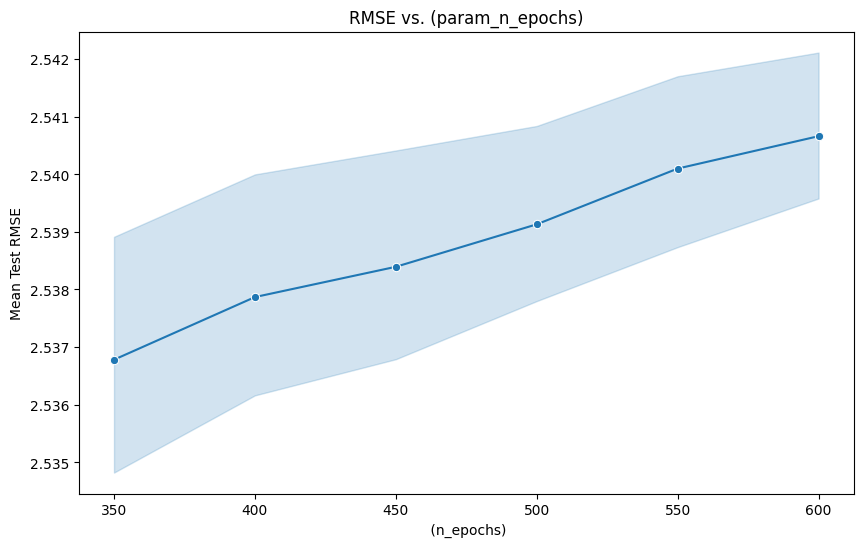

In [ ]:
filtered_df = results_df[results_df['param_n_epochs'] == 60]  # Example filter

# Creating the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x='param_n_factors', y='mean_test_rmse', marker='o')
plt.title('RMSE vs. (param_n_epochs)')
plt.xlabel(' (n_epochs)')
plt.ylabel('Mean Test RMSE')
plt.show()

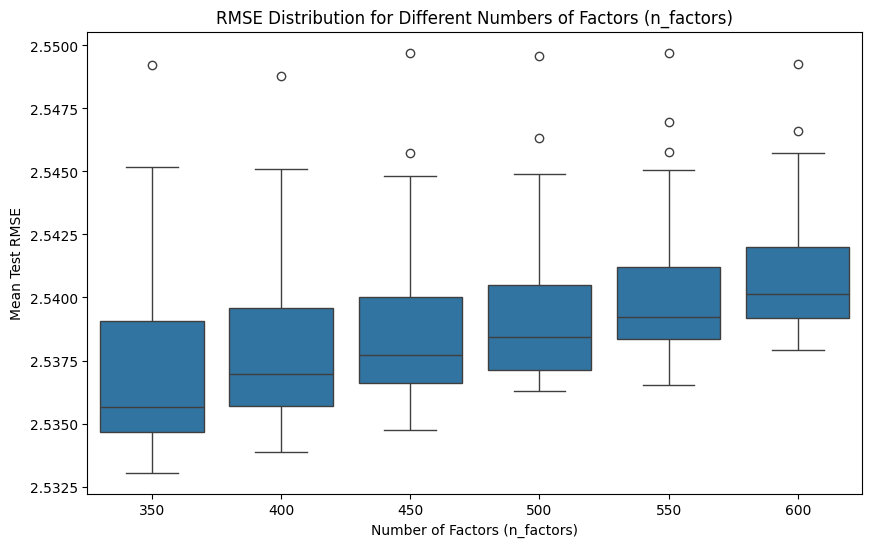

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x='param_n_factors', y='mean_test_rmse')
plt.title('RMSE Distribution for Different Numbers of Factors (n_factors)')
plt.xlabel('Number of Factors (n_factors)')
plt.ylabel('Mean Test RMSE')
plt.show()

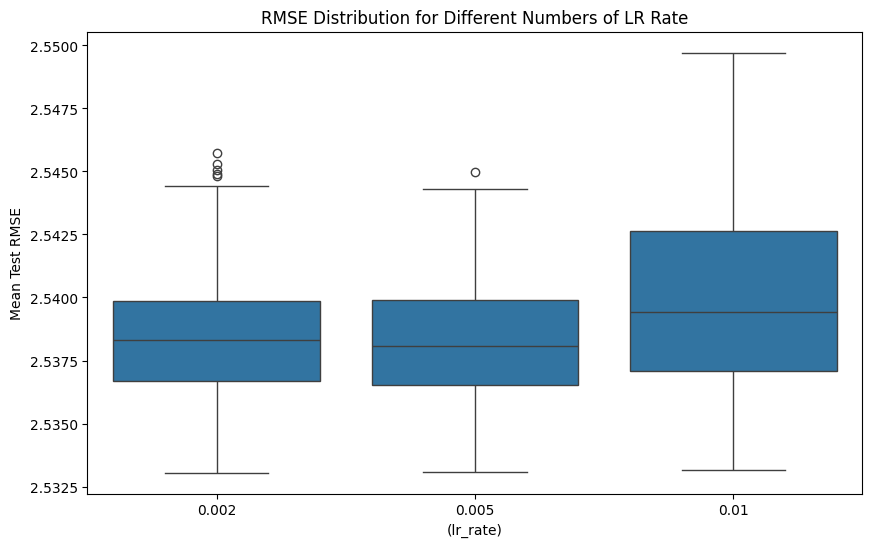

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x='param_lr_all', y='mean_test_rmse')
plt.title('RMSE Distribution for Different Numbers of LR Rate')
plt.xlabel('(lr_rate)')
plt.ylabel('Mean Test RMSE')
plt.show()

# Evaluate Models:

## SVD vs. Baseline Model Statistics

In [ ]:
best_params = gs.best_params['rmse']
svd_model = SVD(n_factors=best_params['n_factors'], n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])
svd_model.fit(trainset)

print("Evaluating SVD recomender model:\n")
# make predicitons
test_predictions = svd_model.test(testset)
# Compute and print RMSE
rmse = accuracy.rmse(test_predictions)

# Compute and print MAE
mae = accuracy.mae(test_predictions)


print("Evaluating SVD vs. Baseline:\n")
print(f"RMSE: {rmse:.4f} VS. baseline: {rmse_user:.4f}")
print(f"MAE: {mae:.4f} VS. baseline: {mae_user:.4f}")

Evaluating SVD recomender model:

RMSE: 2.5687
MAE:  1.8944
Evaluating SVD vs. Baseline:

RMSE: 2.5687 VS. baseline: 2.5655
MAE: 1.8944 VS. baseline: 1.8814


# Exploratory Analysis:

## Top users by play count

In [ ]:
most_played_users = merged_df.groupby('user_id')['play_count'].sum().sort_values(ascending=False).head(10)
print(most_played_users)

user_id
2720cddf6a06d75974c51abea00149bab810ed25    208
Khushi A                                    200
Michael V                                   200
cb0541cd501ebe6d4aad1b8faa8c25edbb1ce658    156
a1cc4d088600df2db42e6a305974675ffe8c905d    117
073c2491732989cc7f660f41d60f42a264b597b2    109
ee3693fad5cae313e2bf302249058a433fac880f    109
561b588dc15f06a6dd9d07df121dd8cf1539e9c8     83
bd4ff15c7ceb5004d852c94a09ffb03cbef406c7     82
022c8283a63160745e02f74c510d79780bce715a     81
Name: play_count, dtype: int64


## Top users unique song count

In [ ]:
top_unique_song = merged_df.groupby('user_id')['play_count'].sum().sort_values(ascending=False).head(10).index

top_unique_df = merged_df[merged_df['user_id'].isin(top_unique_song)]
unique_count = top_unique_df.groupby('user_id')['song_id'].nunique()
unique_count

user_id
022c8283a63160745e02f74c510d79780bce715a     1
073c2491732989cc7f660f41d60f42a264b597b2     1
2720cddf6a06d75974c51abea00149bab810ed25     2
561b588dc15f06a6dd9d07df121dd8cf1539e9c8     1
Khushi A                                    20
Michael V                                   20
a1cc4d088600df2db42e6a305974675ffe8c905d     1
bd4ff15c7ceb5004d852c94a09ffb03cbef406c7     1
cb0541cd501ebe6d4aad1b8faa8c25edbb1ce658     1
ee3693fad5cae313e2bf302249058a433fac880f     2
Name: song_id, dtype: int64

## Top 10 artists by listeners

In [ ]:
popular = merged_df[['artist_name','song','play_count']]

artist_pop = popular.pivot_table(values=['play_count'],index = 'artist_name' ,aggfunc = 'sum')

artist_pop = artist_pop.sort_values(by='play_count',ascending=False)

artist_pop = artist_pop.reset_index()

artist_pop.rename(columns = {'artist_name':'Artist', 'play_count':'Total User'}, inplace = True)

artist_pop.head(10)

,Artist,Total User
0,Kings Of Leon,338
1,Björk,277
2,OneRepublic,222
3,Barry Tuckwell/Academy of St Martin-in-the-Fie...,210
4,The fFormula,207
5,Alliance Ethnik,185
6,Train,173
7,Taylor Swift,166
8,The Black Keys,165
9,Coldplay,164


## Top 10 songs by listeners


In [ ]:
popular = merged_df[['artist_name','song','play_count']]

artist_pop = popular.pivot_table(values=['play_count'],index = ['artist_name','song'] ,aggfunc = 'sum')

artist_pop = artist_pop.sort_values(by='play_count',ascending=False)

artist_pop = artist_pop.reset_index()

artist_pop = artist_pop.head(10)

artist_pop

,artist_name,song,play_count
0,Björk,Undo,261
1,Kings Of Leon,Revelry,247
2,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,210
3,The fFormula,Cold Blooded (Acid Cleanse),207
4,OneRepublic,Secrets,157
5,The Swell Season,Fitzcarraldo (Live),156
6,Dwight Yoakam,You're The One,153
7,Alliance Ethnik,Représente,147
8,Sam Cooke,Ain't Misbehavin,146
9,Ricchi E Poveri,La Prima Cosa Bella,142


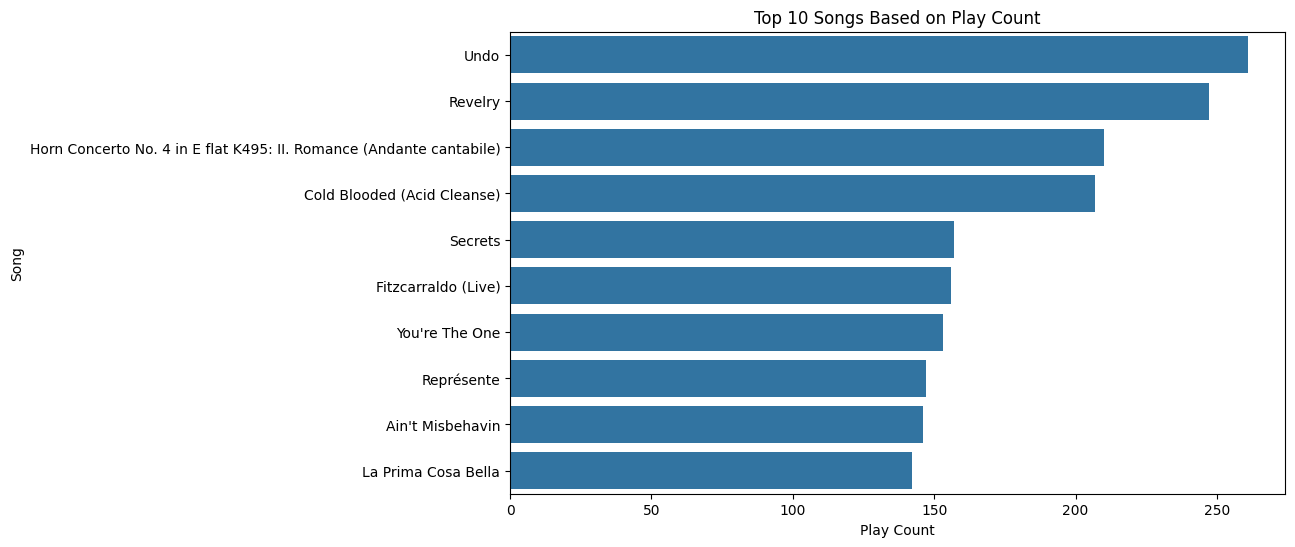

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='play_count', y='song', data=artist_pop)
plt.title('Top 10 Songs Based on Play Count')
plt.xlabel('Play Count')
plt.ylabel('Song')
plt.show()

## Histogram of bins

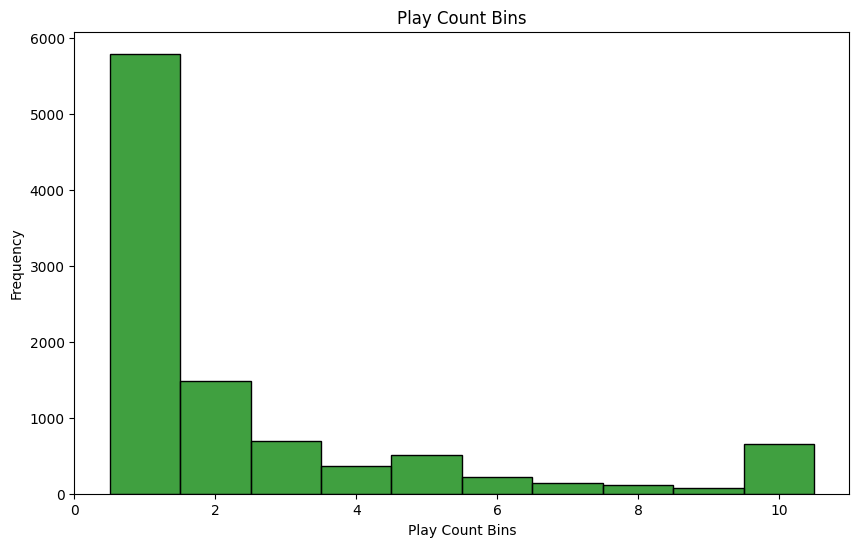

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['play_count_binned'], bins=bins, kde=False, color='green')
plt.title('Play Count Bins')
plt.xlabel('Play Count Bins')
plt.ylabel('Frequency')
plt.show()

# Make Recommendations:

## Make reccomedations with SVd Model

In [ ]:
def get_top_n_recommendations(user_id, data, model, n=10):
    # 1. Identify all unique songs in the dataset
    all_songs = data.df['song_id'].unique()

    # 2. Filter out songs that the user has already reviewed
    reviewed_songs = data.df[data.df['user_id'] == user_id]['song_id'].unique()
    songs_to_predict = np.setdiff1d(all_songs, reviewed_songs)

    # 3. Use the model to predict the ratings for these songs
    predictions = [model.predict(user_id, song).est for song in songs_to_predict]

    # 4. Combine songs and predictions into a list of tuples and sort them
    song_predictions = list(zip(songs_to_predict, predictions))
    song_predictions.sort(key=lambda x: x[1], reverse=True)

    # Return the top n songs
    return song_predictions[:n]

## My song reccomendations

In [ ]:
#use the function
user_id1 = 'Michael V'  # replace with the user ID
top_songs1 = get_top_n_recommendations(user_id1, data, svd_model, n=10)
print(f"Top 10 Song Recommendations for : {user_id1}")

for song_id, predicted_rating in top_songs1:
    print(f"{song_id}: {predicted_rating:.4f}")

Top 10 Song Recommendations for : Michael V
SOJYISZ12A8C135F5A: 8.8481
SOEGIYH12A6D4FC0E3: 8.5984
SOSXLTC12AF72A7F54: 8.5617
SOHTKMO12AB01843B0: 8.1773
SOTDFFF12A58A7EED0: 8.1282
SOBOUPA12A6D4F81F1: 7.9134
SOVDSJC12A58A7A271: 7.9040
SOUNZHU12A8AE47481: 7.8674
SOUFWEW12AB0180EB7: 7.8563
SOTCMDJ12A6D4F8528: 7.7949


## Create my song df

In [ ]:
predMV = pd.DataFrame(top_songs1, columns=["song_id", "play_count"])
merged_predMV = pd.merge(predMV, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_predMV

,song_id,play_count,track_id,artist_name,song
0,SOJYISZ12A8C135F5A,8.848109,TRXFRRY128F42997E1,Shaggy / Samantha Cole,Luv Me_ Luv Me
1,SOEGIYH12A6D4FC0E3,8.598353,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,SOSXLTC12AF72A7F54,8.561731,TRONYHY128F92C9D11,Kings Of Leon,Revelry
3,SOHTKMO12AB01843B0,8.177315,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,SOTDFFF12A58A7EED0,8.128237,TRCVLJD128F9311C67,Enrique Iglesias,Ring My Bells
5,SOBOUPA12A6D4F81F1,7.913372,TRMGUWH128F146903A,Alliance Ethnik,Sincerité Et Jalousie
6,SOVDSJC12A58A7A271,7.904028,TRRBUQL12903CCE501,Sam Cooke,Ain't Misbehavin
7,SOUNZHU12A8AE47481,7.867417,TRAIUAZ128F425D222,Ron Carter,I CAN'T GET STARTED
8,SOUFWEW12AB0180EB7,7.856307,TRNPHAW12903CDFE22,Asia 2001,Epilogue
9,SOTCMDJ12A6D4F8528,7.794893,TRZJNDO128EF343498,Angels and Airwaves,The Gift


## Peer song recommendations

In [ ]:
#use the function
user_id2 = 'Khushi A'  # replace with the user ID
top_songs2 = get_top_n_recommendations(user_id2, data, svd_model, n=10)
print(f"Top 10 Song Recommendations for : {user_id2}")

for song_id, predicted_rating in top_songs2:
    print(f"{song_id}: {predicted_rating:.4f}")

## Create peer song df

In [ ]:
predMV = pd.DataFrame(top_songs2, columns=["song_id", "play_count"])
merged_predMV = pd.merge(predMV, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_predMV

,song_id,play_count,track_id,artist_name,song
0,SOCWRMC12A58A7AFE5,8.021036,TRBVQYK128F4272647,Chris Cornell,You Know My Name
1,SOMYDAX12A6D4F6979,7.879059,TRVWPJR128F1469F5C,Sheila Chandra,Blacksmith
2,SOIRRSV12A6D4FAE47,7.758868,TRVKMFE128F422BE14,Egberto Gismonti,Frevo
3,SOUDLVN12AAFF43658,7.751704,TRJRECT12903CBADA3,Bill Withers,Make Love To Your Mind
4,SOSXLTC12AF72A7F54,7.729752,TRONYHY128F92C9D11,Kings Of Leon,Revelry
5,SOUFWEW12AB0180EB7,7.685816,TRNPHAW12903CDFE22,Asia 2001,Epilogue
6,SOCUCRW12A8C13B159,7.555542,TRDTVMO128F4271696,Guildo Horn,Ein Kleiner Matrose
7,SOMHEXB12AB018438D,7.508320,TRSHHMH128F9319F4E,Maldita Nerea,Por El Miedo A Equivocarnos
8,SOLGPOU12A58A7EA20,7.490217,TRTELZC128F14540C1,Todd Barry,Sugar Ray (LP Version)
9,SOHXWUX12AB01821DC,7.482888,TRXUGZN128F931EDA1,Delerium feat. Sarah McLachlan,Silence


# Random 5 user recommendations

## Random User 1

In [ ]:
user_id3 = 'd7083f5e1d50c264277d624340edaaf3dc16095b'  # replace with the user ID
top_songs3 = get_top_n_recommendations(user_id3, data, svd_model, n=5)
print(f"Top 10 Song Recommendations for : {user_id3}")

for song_id, predicted_rating in top_songs3:
    print(f"{song_id}: {predicted_rating:.4f}")

In [ ]:
pred3 = pd.DataFrame(top_songs3, columns=["song_id", "play_count"])
merged_pred3 = pd.merge(pred3, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred3

,song_id,play_count,track_id,artist_name,song
0,SOOFYTN12A6D4F9B35,4.027511,TRRGQKP128F1469E20,Alliance Ethnik,Représente
1,SOJYISZ12A8C135F5A,3.832250,TRXFRRY128F42997E1,Shaggy / Samantha Cole,Luv Me_ Luv Me
2,SOCWRMC12A58A7AFE5,3.828703,TRBVQYK128F4272647,Chris Cornell,You Know My Name
3,SOUNZHU12A8AE47481,3.762395,TRAIUAZ128F425D222,Ron Carter,I CAN'T GET STARTED
4,SOEGIYH12A6D4FC0E3,3.683769,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...


## Random User 2

In [ ]:
user_id4 = '91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62'  # replace with the user ID
top_songs4 = get_top_n_recommendations(user_id4, data, svd_model, n=5)
print(f"Top 10 Song Recommendations for : {user_id4}")

for song_id, predicted_rating in top_songs4:
    print(f"{song_id}: {predicted_rating:.4f}")

Top 10 Song Recommendations for : 91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62
SOOFYTN12A6D4F9B35: 4.0275
SOJYISZ12A8C135F5A: 3.8322
SOCWRMC12A58A7AFE5: 3.8287
SOUNZHU12A8AE47481: 3.7624
SOEGIYH12A6D4FC0E3: 3.6838


In [ ]:
pred4 = pd.DataFrame(top_songs4, columns=["song_id", "play_count"])
merged_pred4 = pd.merge(pred4, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred4

,song_id,play_count,track_id,artist_name,song
0,SOOFYTN12A6D4F9B35,4.027511,TRRGQKP128F1469E20,Alliance Ethnik,Représente
1,SOJYISZ12A8C135F5A,3.832250,TRXFRRY128F42997E1,Shaggy / Samantha Cole,Luv Me_ Luv Me
2,SOCWRMC12A58A7AFE5,3.828703,TRBVQYK128F4272647,Chris Cornell,You Know My Name
3,SOUNZHU12A8AE47481,3.762395,TRAIUAZ128F425D222,Ron Carter,I CAN'T GET STARTED
4,SOEGIYH12A6D4FC0E3,3.683769,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...


## Random User 3

In [ ]:
user_id5 = '47bf07bcb932cf88175ba3eb218401f9fa15fe6b'  # replace with the user ID
top_songs5 = get_top_n_recommendations(user_id5, data, svd_model, n=5)
print(f"Top 10 Song Recommendations for : {user_id5}")

for song_id, predicted_rating in top_songs5:
    print(f"{song_id}: {predicted_rating:.4f}")

Top 10 Song Recommendations for : 47bf07bcb932cf88175ba3eb218401f9fa15fe6b
SOOFYTN12A6D4F9B35: 4.0275
SOJYISZ12A8C135F5A: 3.8322
SOCWRMC12A58A7AFE5: 3.8287
SOUNZHU12A8AE47481: 3.7624
SOEGIYH12A6D4FC0E3: 3.6838


In [ ]:
pred5 = pd.DataFrame(top_songs5, columns=["song_id", "play_count"])
merged_pred5 = pd.merge(pred5, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred5

,song_id,play_count,track_id,artist_name,song
0,SOOFYTN12A6D4F9B35,4.027511,TRRGQKP128F1469E20,Alliance Ethnik,Représente
1,SOJYISZ12A8C135F5A,3.832250,TRXFRRY128F42997E1,Shaggy / Samantha Cole,Luv Me_ Luv Me
2,SOCWRMC12A58A7AFE5,3.828703,TRBVQYK128F4272647,Chris Cornell,You Know My Name
3,SOUNZHU12A8AE47481,3.762395,TRAIUAZ128F425D222,Ron Carter,I CAN'T GET STARTED
4,SOEGIYH12A6D4FC0E3,3.683769,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...


## Random User 4

In [ ]:
user_id6 = '05b9035fe02ebdf5535ae9ec07de1e935ffa43df'  # replace with the user ID
top_songs6 = get_top_n_recommendations(user_id6, data, svd_model, n=5)
print(f"Top 10 Song Recommendations for : {user_id6}")

for song_id, predicted_rating in top_songs6:
    print(f"{song_id}: {predicted_rating:.4f}")

In [ ]:
pred6 = pd.DataFrame(top_songs6, columns=["song_id", "play_count"])
merged_pred6 = pd.merge(pred6, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred6

,song_id,play_count,track_id,artist_name,song
0,SOOFYTN12A6D4F9B35,4.027511,TRRGQKP128F1469E20,Alliance Ethnik,Représente
1,SOJYISZ12A8C135F5A,3.832250,TRXFRRY128F42997E1,Shaggy / Samantha Cole,Luv Me_ Luv Me
2,SOCWRMC12A58A7AFE5,3.828703,TRBVQYK128F4272647,Chris Cornell,You Know My Name
3,SOUNZHU12A8AE47481,3.762395,TRAIUAZ128F425D222,Ron Carter,I CAN'T GET STARTED
4,SOEGIYH12A6D4FC0E3,3.683769,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...


## Random User 5

In [ ]:
user_id7 = '0b254c684efb08fd04933add2d1e4191d2a87bac'  # replace with the user ID
top_songs7 = get_top_n_recommendations(user_id7, data, svd_model, n=5)
print(f"Top 10 Song Recommendations for : {user_id7}")

for song_id, predicted_rating in top_songs7:
    print(f"{song_id}: {predicted_rating:.4f}")

In [ ]:
pred7 = pd.DataFrame(top_songs7, columns=["song_id", "play_count"])
merged_pred7 = pd.merge(pred7, df_tracks.drop_duplicates(['song_id']), how='left', on='song_id')
merged_pred7

,song_id,play_count,track_id,artist_name,song
0,SOOFYTN12A6D4F9B35,4.093080,TRRGQKP128F1469E20,Alliance Ethnik,Représente
1,SOUFTBI12AB0183F65,3.951755,TRIXAZF128F421EE64,Tub Ring,Invalid
2,SOUNZHU12A8AE47481,3.794563,TRAIUAZ128F425D222,Ron Carter,I CAN'T GET STARTED
3,SOCWRMC12A58A7AFE5,3.787448,TRBVQYK128F4272647,Chris Cornell,You Know My Name
4,SODJWHY12A8C142CCE,3.775919,TRVCUSW128F92F20C6,Train,Hey_ Soul Sister
